C:\Users\nexus\AppData\Local\Temp\ipykernel_38564\3286705913.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extreme.loc[:, "Decade"] = (df_extreme["Year"] // 10) * 10


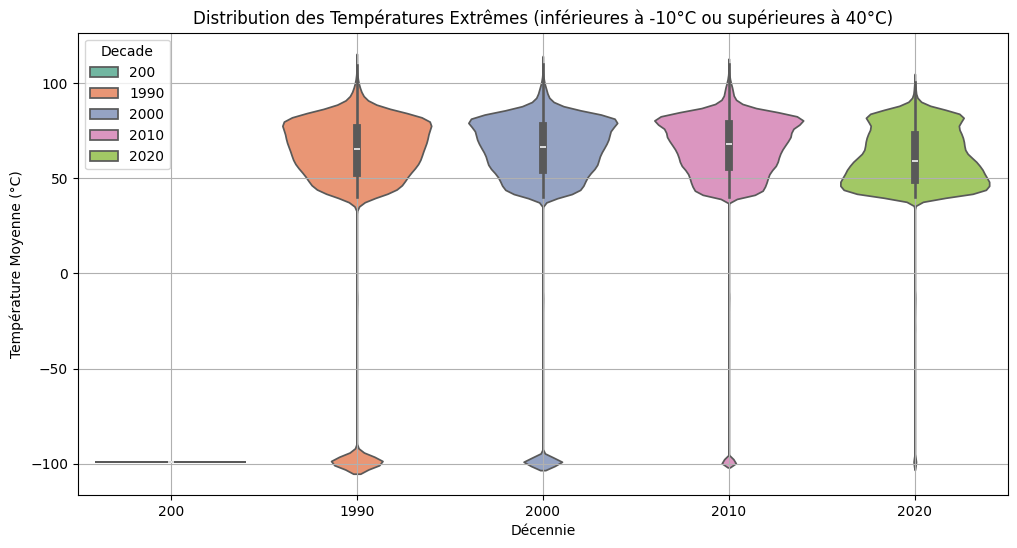

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("../city_temperature.csv", sep=",", low_memory=False)

# Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces
df.columns = df.columns.str.strip()

# Filtrer les données pour les températures extrêmes
df_extreme = df[(df["AvgTemperature"] < -10) | (df["AvgTemperature"] > 40)]

# Créer une nouvelle colonne pour la décennie en utilisant .loc
df_extreme.loc[:, "Decade"] = (df_extreme["Year"] // 10) * 10

# Vérifier si des données existent après filtrage
if df_extreme.empty:
    print("Aucune température extrême trouvée dans les données.")
else:
    # Tracer le violin plot pour comparer les températures extrêmes
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Decade", y="AvgTemperature", data=df_extreme, palette="Set2", hue="Decade")
    
    # Personnalisation du graphique
    plt.title("Distribution des Températures Extrêmes (inférieures à -10°C ou supérieures à 40°C)")
    plt.xlabel("Décennie")
    plt.ylabel("Température Moyenne (°C)")
    plt.grid(True)

    # Affichage
    plt.show()
